In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve

LOADING DATASET

In [2]:
data = pd.read_csv('Book1.csv')

In [3]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Cloudy starting in the morning.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


Checking for Null values

In [5]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

DATA CLEANING

In [6]:
data['Precip Type'].fillna(value='Unknown', inplace=True)

In [7]:
data.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [8]:
# Check for duplicates
duplicates = data.duplicated()

# Display rows with duplicates
duplicate_rows = data[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                      Formatted Date Summary Precip Type  Temperature (C)  \
36072  2010-08-02 00:00:00.000 +0200   Clear        rain        18.800000   
36073  2010-08-02 01:00:00.000 +0200   Clear        rain        18.222222   
36074  2010-08-02 02:00:00.000 +0200   Clear        rain        18.072222   
36075  2010-08-02 03:00:00.000 +0200   Clear        rain        16.622222   
36076  2010-08-02 04:00:00.000 +0200   Clear        rain        16.094444   
36077  2010-08-02 05:00:00.000 +0200   Clear        rain        15.955556   
36078  2010-08-02 06:00:00.000 +0200   Clear        rain        17.088889   
36079  2010-08-02 07:00:00.000 +0200   Clear        rain        20.822222   
36080  2010-08-02 08:00:00.000 +0200   Clear        rain        23.405556   
36081  2010-08-02 09:00:00.000 +0200   Clear        rain        26.050000   
36082  2010-08-02 10:00:00.000 +0200   Clear        rain        27.688889   
36083  2010-08-02 11:00:00.000 +0200   Clear        rain    

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
# Check for duplicates
duplicates = data.duplicated()

# Display rows with duplicates
duplicate_rows = data[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), Daily Summary]
Index: []


DATA VISUALIZATION

In [11]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000
mean,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915
std,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [12]:
data.drop(columns=['Formatted Date','Precip Type','Daily Summary'],axis=1,inplace=True)

In [13]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

C:\Users\DELLPC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


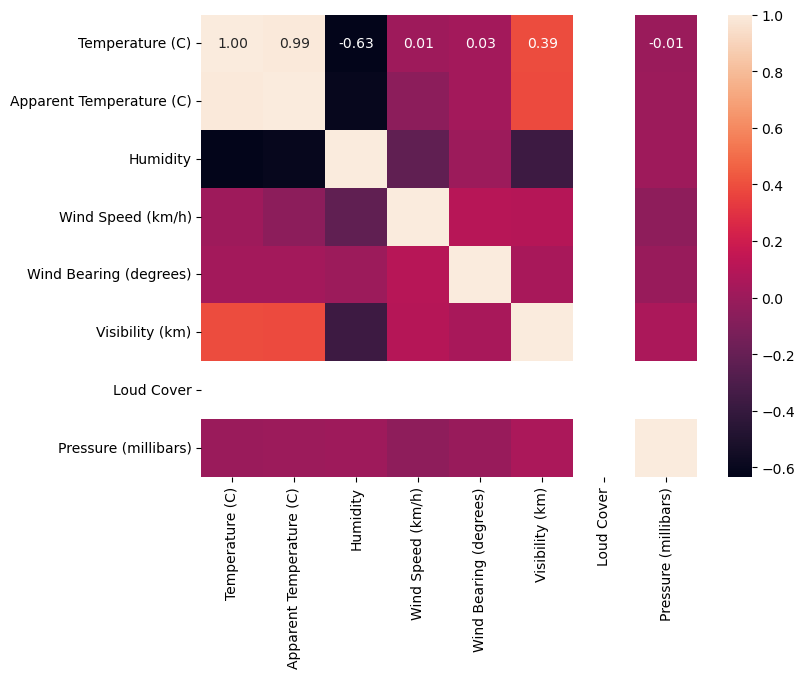

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

<Axes: ylabel='Frequency'>

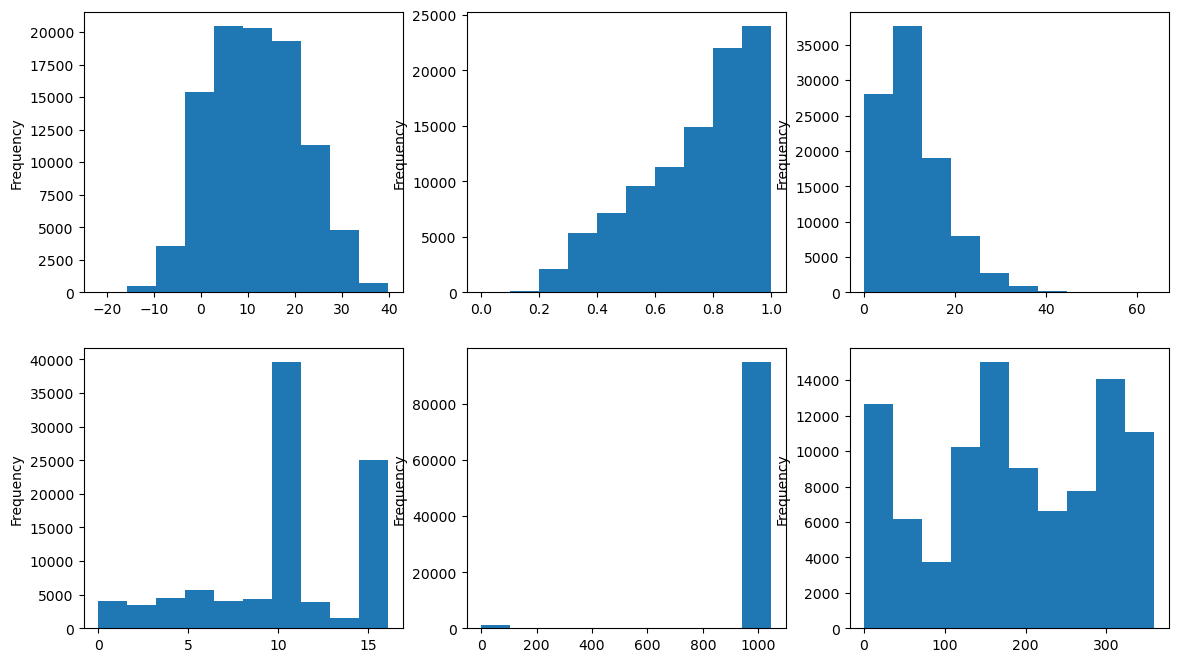

In [15]:
fig,axs=plt.subplots(2,3,figsize=(14,8))
data['Temperature (C)'].plot(kind='hist',ax=axs[0,0])
data['Humidity'].plot(kind='hist',ax=axs[0,1])
data['Wind Speed (km/h)'].plot(kind='hist',ax=axs[0,2])
data['Visibility (km)'].plot(kind='hist',ax=axs[1,0])
data['Pressure (millibars)'].plot(kind='hist',ax=axs[1,1])
data['Wind Bearing (degrees)'].plot(kind='hist',ax=axs[1,2])

C:\Users\DELLPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELLPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


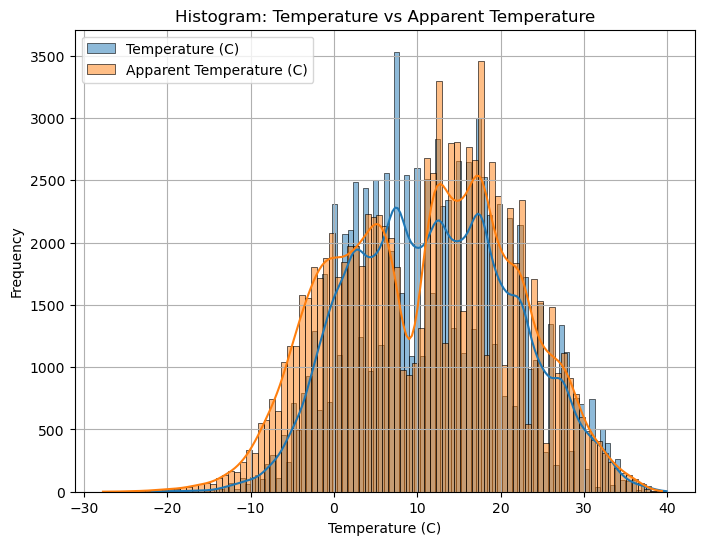

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Temperature (C)', label='Temperature (C)',kde=True)
sns.histplot(data=data, x='Apparent Temperature (C)', label='Apparent Temperature (C)', kde=True)
plt.title('Histogram: Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

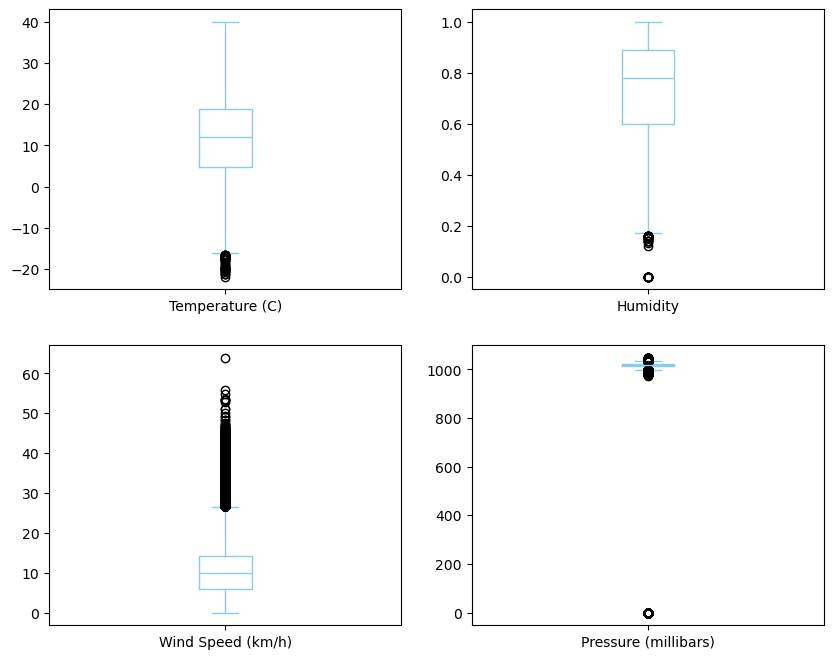

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
#columns_for_boxplot = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
data['Temperature (C)'].plot(kind='box',ax=axs[0,0],color='skyblue')
data['Humidity'].plot(kind='box',ax=axs[0,1],color='skyblue')
data['Wind Speed (km/h)'].plot(kind='box',ax=axs[1,0],color='skyblue')
data['Pressure (millibars)'].plot(kind='box',ax=axs[1,1],color='skyblue')

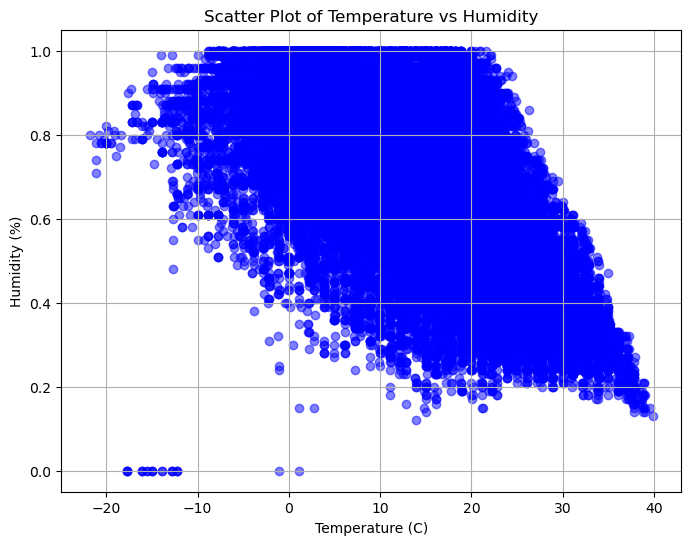

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature (C)'], data['Humidity'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Temperature vs Humidity')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.grid(True)

TRAINING

In [19]:
lc=LabelEncoder()
data['Summary']=lc.fit_transform(data['Summary'])
data.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [20]:
lc.classes_

array(['Breezy', 'Clear', 'Cloudy', 'Drizzle', 'Dry', 'Foggy', 'Humid',
       'Overcast', 'Rain', 'Windy'], dtype=object)

In [21]:
for idx, label in enumerate(lc.classes_):
    print(f"{label}: {idx}")

Breezy: 0
Clear: 1
Cloudy: 2
Drizzle: 3
Dry: 4
Foggy: 5
Humid: 6
Overcast: 7
Rain: 8
Windy: 9


In [22]:
x=((data.loc[:,data.columns!='Summary']).astype(int)).values[:,0:]
y=data['Summary'].values

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [24]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:69.04%


In [25]:
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:74.16%


In [26]:
regr= RandomForestRegressor(max_depth=10, random_state=0,n_estimators=100)
regr.fit(x_test,y_test)
print('random forest accuracy:{:.2f}%'.format(regr.score(x_test,y_test)*100))

random forest accuracy:42.88%


In [27]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print('Decision Tree accuracy:{:.2f}%'.format(decision_tree.score(x_test,y_test)*100))

Decision Tree accuracy:66.42%


In [28]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Ada Boost accuracy:{:.2f}%'.format(ada_boost.score(x_test,y_test)*100))

Ada Boost accuracy:62.77%


In [29]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

GBC accuracy:63.88%


In [30]:
input_data = [[1.872222222,-0.15,0.91,6.8264,243,15.8263,0,1033.2]]
output = xgb.predict(input_data)
print('the weather is:')
if(output==1):
  print('Breezy')
elif (output==2):
  print('Cloudy')
elif (output==3):
  print('Drizzle')
elif (output==4):
  print('Dry')
elif (output==5):
  print('Foggy')
elif (output==6):
  print('Humid')
elif (output==7):
  print('Overcast')
elif (output==8):
  print('Rain')
else:
  print('Windy')

the weather is:
Breezy


In [36]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Instantiate XGBoost classifier
classifier = xgb.XGBClassifier(n_estimators=20, random_state=0)

# Train the classifier
classifier.fit(x_train, y_train)

# Make predictions
y_pred = classifier.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  302     0     8     0     0     1     0     3     0     1]
 [    1   206  1811     0     0    43     0   105     0     0]
 [   27    55 11355     0     0    15     0   494     0     0]
 [    0     0     6     0     0     2     0     2     0     0]
 [    1     0    26     0     2     0     0     0     0     0]
 [    2     2    12     0     0  1319     0   114     0     0]
 [    0     0    13     0     0     0     0     0     0     0]
 [   13    16  2229     0     0    29     0  1013     0     0]
 [    0     0     6     0     0     2     0     1     3     0]
 [    0     0     0     0     0     0     0     0     0    46]]


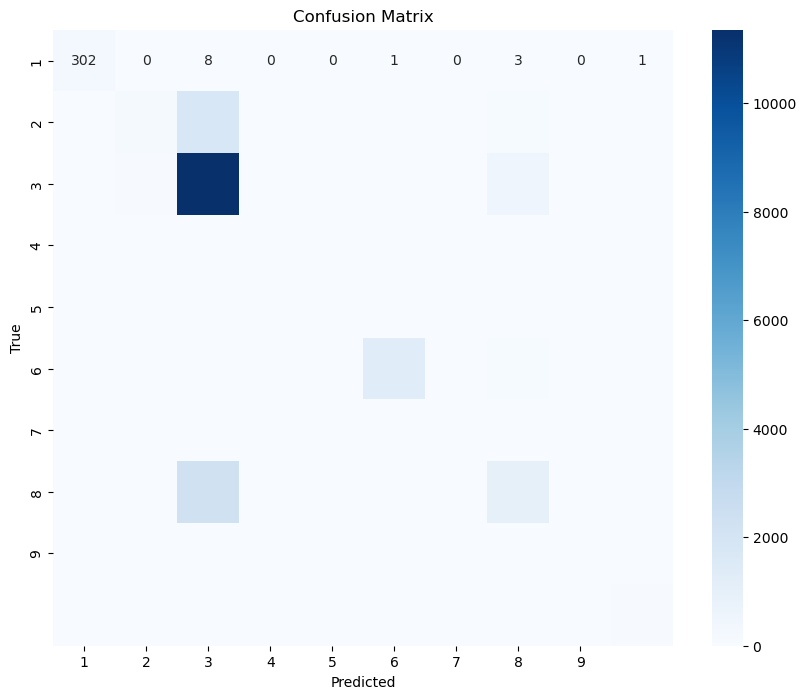

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


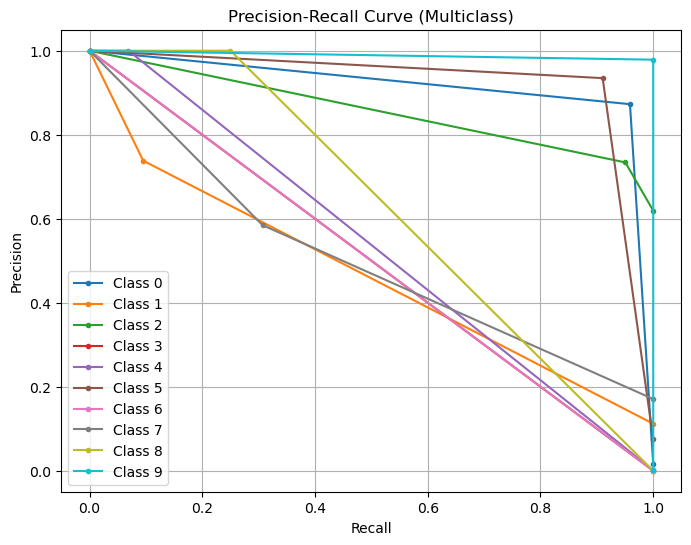

In [38]:
precision = dict()
recall = dict()
plt.figure(figsize=(8, 6))
n_classes = len(set(y_test))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred == i)
    plt.plot(recall[i], precision[i], marker='.', label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()